<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Inteligencia%20artificial%20y%20aprendizaje%20autom%C3%A1tico/Redneuronal_Equipo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

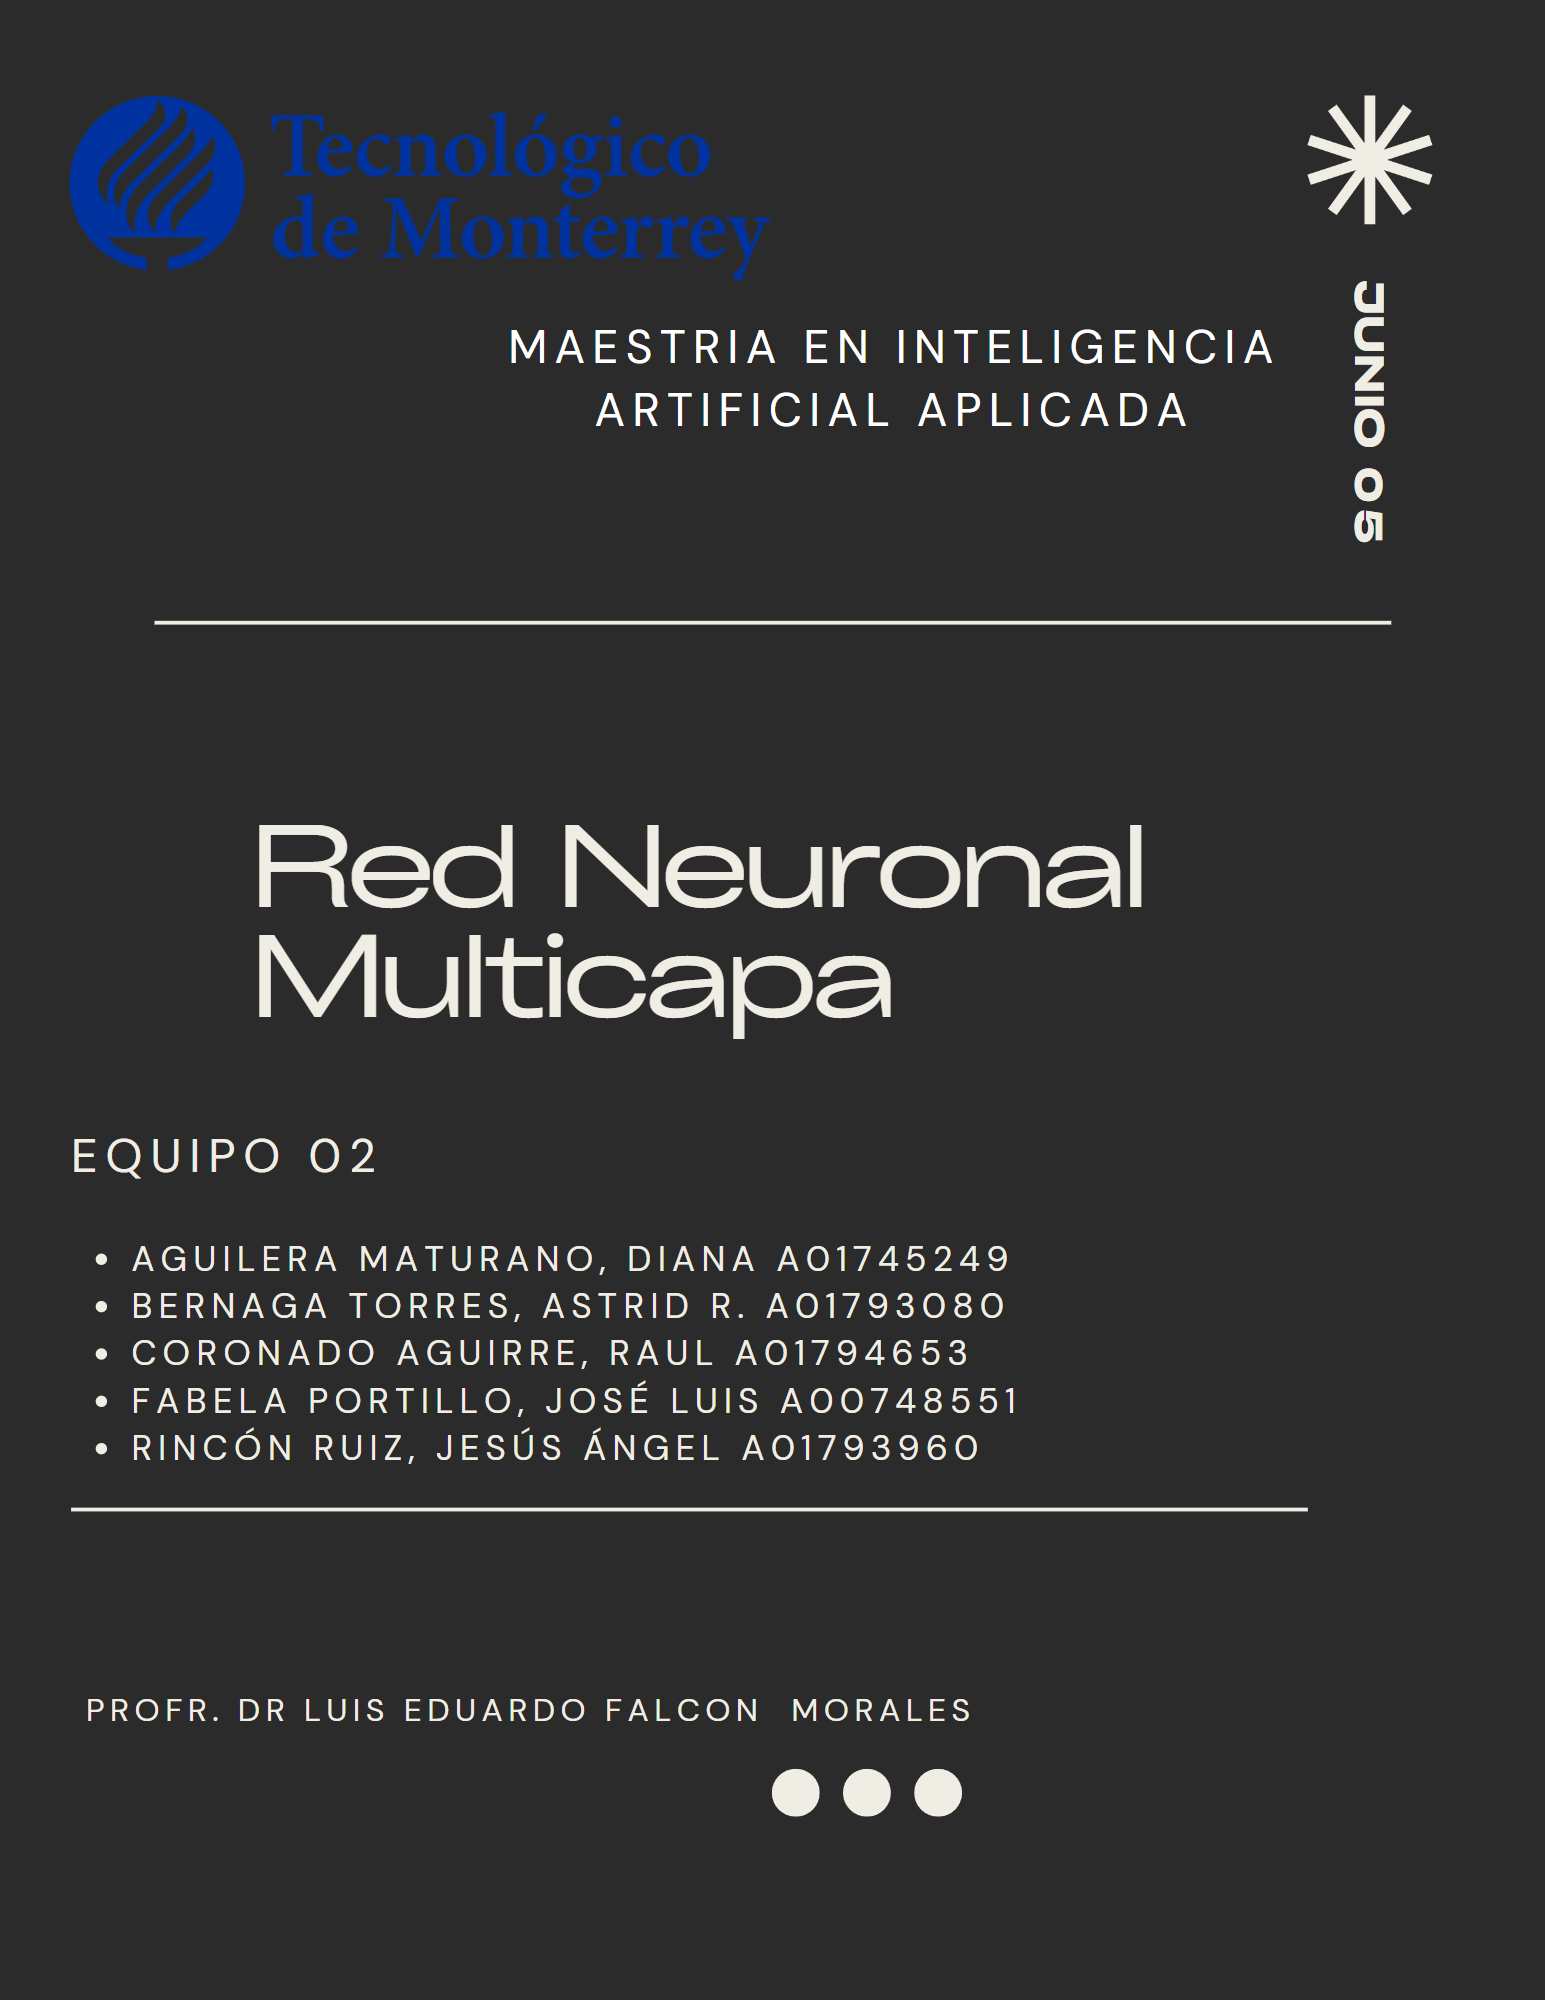

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

El objetivo del articulo en el que se basa esta actividad es determinar el impacto generado por un anuncio de una marca de cosméticos en Facebook, en el cual se intentaron varias variantes en la manera de mostrar el anuncio.

Siguiendo el artículo, debemos considerar como predictores o variables de entrada aquellas que se indican en la Tabla 3.

Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando determinar cuál puede ser el mejor caso para medir el éxito de la campaña.


In [ ]:
# Importación de módulos y librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importación de clases y funciones específicas
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_validate, GridSearchCV, learning_curve, validation_curve, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, FunctionTransformer, PowerTransformer, OneHotEncoder, StandardScaler, power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn import svm, datasets, preprocessing
from sklearn.metrics import recall_score, confusion_matrix, classification_report, make_scorer, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from pandas.core.arrays import categorical
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from google.colab import drive

# Importación de librerías específicas
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced

#**Ejercicio 1**

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado.

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# URL de descarga compartida de Google Drive
url = 'https://drive.google.com/uc?id=1z9dr1NeT6KHZtCHhLTCC9mr1az1NW2gr'

# Descarga del archivo
file = 'dataset_Facebook.csv'

# Carga del conjunto de datos en un DataFrame
df = pd.read_csv("/content/drive/Shareddrives/Equipo 2_IA/Semana 7/dataset_Facebook.csv", sep=";")


#Renombrar la variable Lifetime People who have liked your Page and engaged with your post
df.rename(columns= {"Lifetime People who have liked your Page and engaged with your post":"LPE"}, inplace = True)
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [ ]:
print(df.shape)

(500, 19)


In [ ]:
# columnas
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page', 'LPE', 'comment',
       'like', 'share', 'Total Interactions'],
      dtype='object')

In [ ]:
#Definición de variables de Entrada y Variable de salida
features = [
  'Category',
  'Page total likes',
  'Type',
  'Post Month',
  'Post Hour',
  'Post Weekday',
  'Paid'
]

output = ['LPE']

X = df[features]
y = df[output]

X.describe(include = "all")

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
count,500.000000,500.000000,500,500.000000,500.000000,500.000000,499.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,Photo,NaN,NaN,NaN,NaN
freq,NaN,NaN,426,NaN,NaN,NaN,NaN
mean,1.880000,123194.176000,NaN,7.038000,7.840000,4.150000,0.278557
std,0.852675,16272.813214,NaN,3.307936,4.368589,2.030701,0.448739
min,1.000000,81370.000000,NaN,1.000000,1.000000,1.000000,0.000000
25%,1.000000,112676.000000,NaN,4.000000,3.000000,2.000000,0.000000
50%,2.000000,129600.000000,NaN,7.000000,9.000000,4.000000,0.000000
75%,3.000000,136393.000000,NaN,10.000000,11.000000,6.000000,1.000000


In [ ]:
le = preprocessing.LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
le.classes_ #corroboramos las etiquetas

array(['Link', 'Photo', 'Status', 'Video'], dtype=object)

In [ ]:
df.isna().any()

Page total likes                                                False
Type                                                            False
Category                                                        False
Post Month                                                      False
Post Weekday                                                    False
Post Hour                                                       False
Paid                                                             True
Lifetime Post Total Reach                                       False
Lifetime Post Total Impressions                                 False
Lifetime Engaged Users                                          False
Lifetime Post Consumers                                         False
Lifetime Post Consumptions                                      False
Lifetime Post Impressions by people who have liked your Page    False
Lifetime Post reach by people who like your Page                False
LPE                 

In [ ]:
df["Paid"].fillna(df["Paid"].mode() [0], inplace=True)

In [ ]:
# Seleccionar las 7 variables de entrada según la Tabla 3 del artículo
variables_entrada = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Hour', 'Paid', 'Lifetime Post Total Reach']
df_entrada = df[variables_entrada]

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LPE     500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


#**Ejercicio 2**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y
validación.

In [ ]:
print(df.columns)

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page', 'LPE', 'comment',
       'like', 'share', 'Total Interactions'],
      dtype='object')


In [ ]:
# Dividir los datos en conjuntos de entrenamiento+validación y prueba
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

print(X_tv.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(X_test.shape, ': dimensión de datos de entrada de prueba')
print(y_tv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(y_test.shape, ': dimensión de variable de salida para prueba')

(400, 7) : dimensión de datos de entrada de entrenamiento y validación
(100, 7) : dimensión de datos de entrada de prueba
(400, 1) : dimensión de variable de salida para entrenamiento y validación
(100, 1) : dimensión de variable de salida para prueba


In [ ]:
X_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 305 to 265
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          400 non-null    int64  
 1   Page total likes  400 non-null    int64  
 2   Type              400 non-null    object 
 3   Post Month        400 non-null    int64  
 4   Post Hour         400 non-null    int64  
 5   Post Weekday      400 non-null    int64  
 6   Paid              399 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 25.0+ KB


In [ ]:
y_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 305 to 265
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LPE     400 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB


**Comentario:** Para alcanzar un total de 100 datos de prueba, es necesario tomar un 20% del total de la información.

#**Ejercicio 3**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE.

In [ ]:
# #Definición de la raíz cuadrada del error cuadrático medio RMSE:
def mi_RMSE(actual, predictions):
  return np.sqrt(np.mean((actual - predictions) ** 2))

#Definición del error absoluto medio MAE
def mi_MAE (actual, predictions):
  return np.mean(np.abs(actual - predictions))

#Definicion del error porcentual absoluto medio MAPE:
def mi_MAPE(actual, predictions):
  return np.abs((( actual - predictions) / actual) * 100).mean()

#**Ejercicio 4**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información.

Variables numéricas:
- Page total likes
- Post month
- Post weekday
- Post hour
- Y-LPE

Variables categóricas:
- Category
- Type
- Paid

In [ ]:
#Análisis a las variables de entrada
print('Análisis a las variables de entrada\n\n')
print(df[features].info(), '\n')
print(df[features].describe(include = 'all') , '\n')

Análisis a las variables de entrada


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          500 non-null    int64  
 1   Page total likes  500 non-null    int64  
 2   Type              500 non-null    int64  
 3   Post Month        500 non-null    int64  
 4   Post Hour         500 non-null    int64  
 5   Post Weekday      500 non-null    int64  
 6   Paid              500 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 27.5 KB
None 

         Category  Page total likes        Type  Post Month   Post Hour  \
count  500.000000        500.000000  500.000000  500.000000  500.000000   
mean     1.880000     123194.176000    1.074000    7.038000    7.840000   
std      0.852675      16272.813214    0.429993    3.307936    4.368589   
min      1.000000      81370.000000    0.000000    1.000000    1.000000   
25

Con el análisis anterior, parece ser que tenemos dos tipos de variables: Numéricas y Categóricas, por lo que se realizarán dos transformaciones, una para cada tipo de variable.

In [ ]:
#Categorización de las variables: cuantitativas y cualitativas
numeric_features = ['Page total likes','Post Month','Post Hour','Post Weekday']
qualitative_features = ['Type','Paid', 'Category']

-------------------------------------
Análisis para variables numéricas de entrada:
------------------------------------

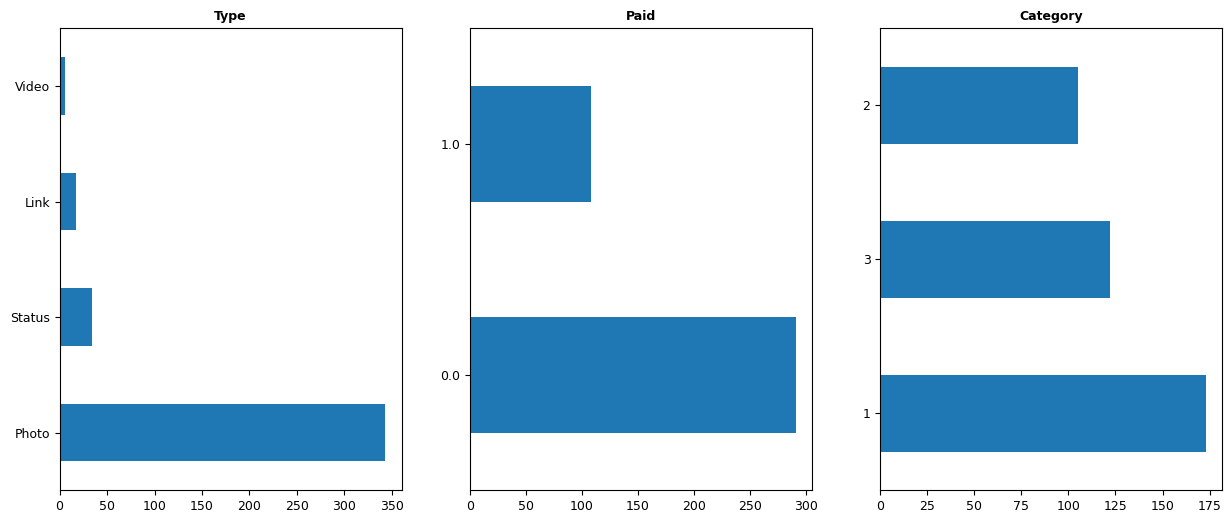

In [ ]:
# Gráfico para cada variable cualitativa

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
axes = axes.flat


for i, colum in enumerate(qualitative_features):
    X_tv[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")

----------------------------------------
Análisis para variables categóricas de entrada:
----------------------------------------

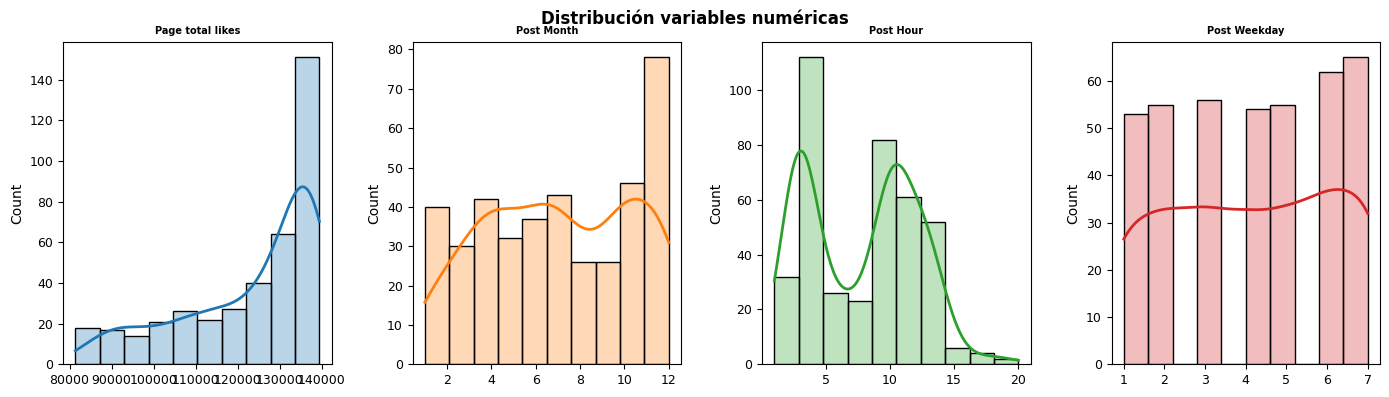

In [ ]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))
axes = axes.flat

for i, colum in enumerate(numeric_features):
    sns.histplot(
        data    = X_tv,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12, fontweight = "bold");

**Comentario final variables entrada:**

Al final, presentamos tres tipos de variables, numéricas, categóricas y binarias (no se les aplicará One-Hot).

In [ ]:
#Categorización de las variables: cuantitativas y cualitativas
numeric_features = ['Page total likes','Post Hour', 'Post Month']
qualitative_features = ['Type', 'Category','Post Weekday']
binary_features = ['Paid']

----------------------------------------
Análisis de variable de salida:
----------------------------------------

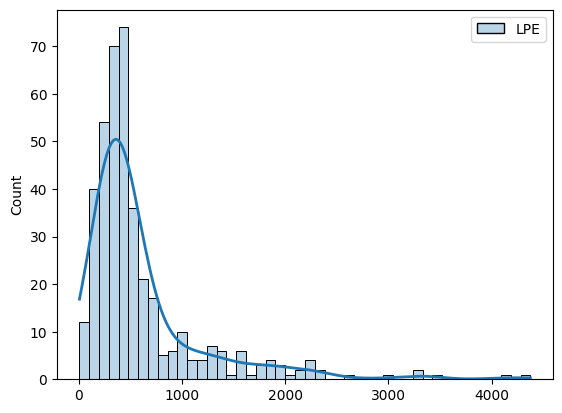

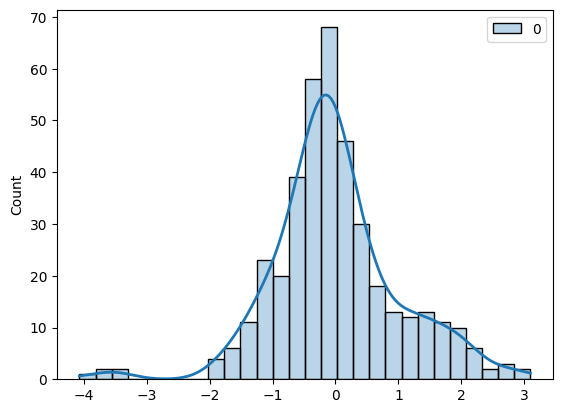

In [ ]:
#variable de entrada sin transformación
sns.histplot(y_tv,
        stat    = "count",
        kde     = True,
        line_kws= {'linewidth': 2},
        alpha   = 0.3)
plt.show()
# variable de entrada con transformación
sns.histplot(power_transform(y_tv, method='box-cox'),
        stat    = "count",
        kde     = True,
        line_kws= {'linewidth': 2},
        alpha   = 0.3)
plt.show()

<Axes: >

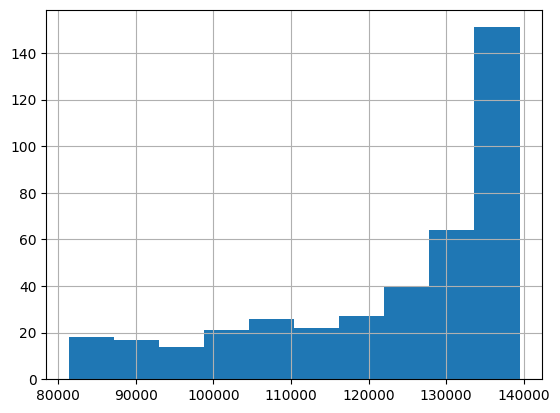

In [ ]:
# Se utiliza Xtv y ytv para evitar el filtrado de información.

X_tv["Page total likes"].hist()


{'whiskers': [<matplotlib.lines.Line2D at 0x7f95a1e16e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95a1e14ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95a1d9b3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f95a1e14b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f95a1e15630>],
 'means': []}

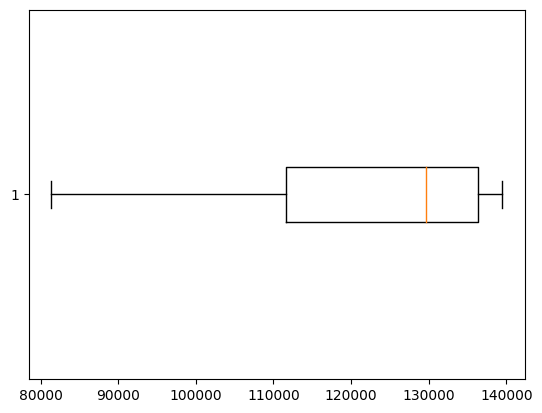

In [ ]:
plt.boxplot(X_tv["Page total likes"], vert=False)

NOTA: Los datos de entrenamiento y validación tienen un sesgo positivo y que hay un poco de ruido (outliers)

-------------------------------------------------
Definición de pipeline y Transformaciones:
-------------------------------------------------

In [ ]:
#Definir las transformaciones para las variables numéricas y categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Transformaciones a factores numéricos de entrada:
cuant_pipeline = Pipeline(steps = [('impt_medianCuant', SimpleImputer(strategy='median')),
                                   ('escala_cuant', MinMaxScaler(feature_range=(0,1))),
                                   ('BoxCoxIndep', PowerTransformer())
                                   ])
cuant_pipeline_nombres = numeric_features
print(cuant_pipeline_nombres)

# Transformaciones a factores cualitativos de entrada:
categoricas_Imp_pipeline = Pipeline(steps = [('impModa_cate', SimpleImputer(strategy='most_frequent')),
                                             ('OneHotE', OneHotEncoder(drop='first'))])
catImp_pipeline_nombres = qualitative_features
print(catImp_pipeline_nombres)

# Transformaciones a factores binarios de entrada:
binarias_pipeline = Pipeline(steps = [('impModa_binary', SimpleImputer(strategy='most_frequent'))])
binarias_pipeline_nombres = binary_features
print(binarias_pipeline_nombres)

# Conjuntamos las transformaciones numéricas y cualitativas que se estarán aplicando a los datos de entrada:
columnasTransformer_X = ColumnTransformer(transformers =
                                          [('cuant_pipe', cuant_pipeline, cuant_pipeline_nombres),
                                           ('categ_pipe', categoricas_Imp_pipeline, catImp_pipeline_nombres),
                                           ('binar_pipe', binarias_pipeline, binarias_pipeline_nombres)],
                                        remainder='passthrough')

# Definir la lista de pasos del Pipeline

# Transformaciones a variable de entrada:
variable_dep_pipeline = Pipeline(steps =
                                     [('impt_medianDep', SimpleImputer(strategy='median')),
                                      #('escala_Dep', MinMaxScaler(feature_range=(1,2))),
                                      #('BoxCoxDep', PowerTransformer())
                                      ])

variable_depNombre_pipeline = [y_tv.columns[0]]
print(variable_depNombre_pipeline)

# Conjuntamos las transformaciones numéricas y cualitativas que se estarán aplicando a los datos de entrada:
columnaTransformer_Y = ColumnTransformer(transformers =
                                          [('vardep', variable_dep_pipeline, variable_depNombre_pipeline)],
                                        remainder='passthrough')

['Page total likes', 'Post Hour', 'Post Month']
['Type', 'Category', 'Post Weekday']
['Paid']
['LPE']


<Axes: >

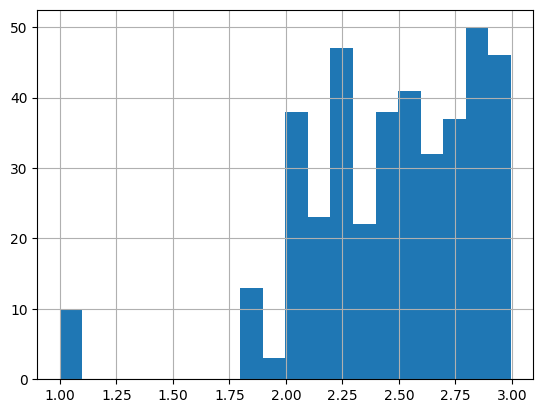

In [ ]:

# Transformación de variable "Page total likes"

maximo = X_tv["Page total likes"].max()
np.power( maximo + 1 - X_tv["Page total likes"], .1).hist(bins=20)

Encontramos que con la transformación de la potencia, podemos compactar los datos para que tengan el comportamiento de una campana de gaus aunque sigue estando un poco cargada a la derecha.

<Axes: >

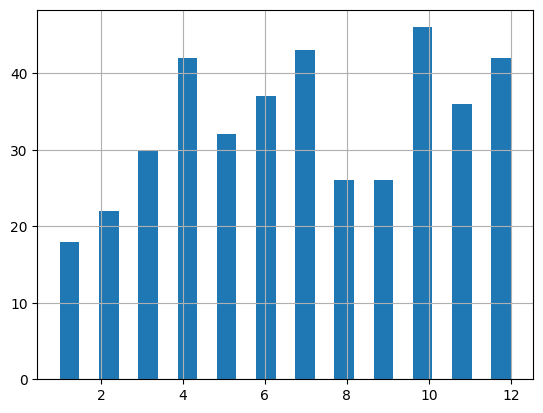

In [ ]:

X_tv["Post Month"].hist(bins=23)

NOTA: No hay tanta diferencia entre los datos por lo que se puede considerar adecuada

<Axes: >

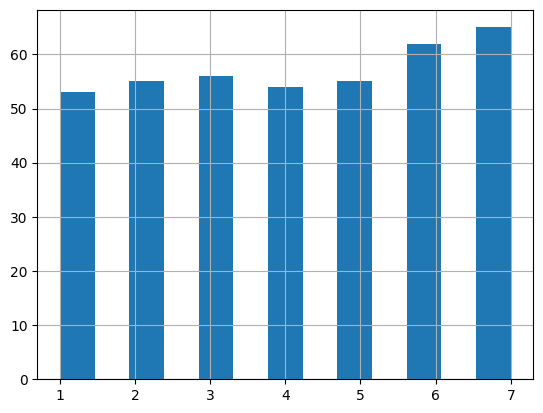

In [ ]:
X_tv["Post Weekday"].hist(bins=13) #Se queda como está

<Axes: >

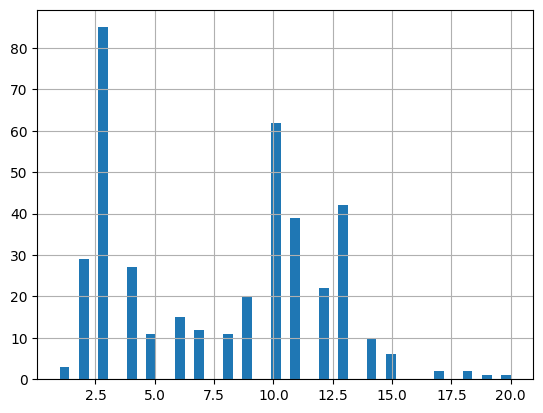

In [ ]:
X_tv["Post Hour"].hist(bins=47) #Esta variable se puede quedar coo está o dicretiarla

array([[<Axes: title={'center': 'LPE'}>]], dtype=object)

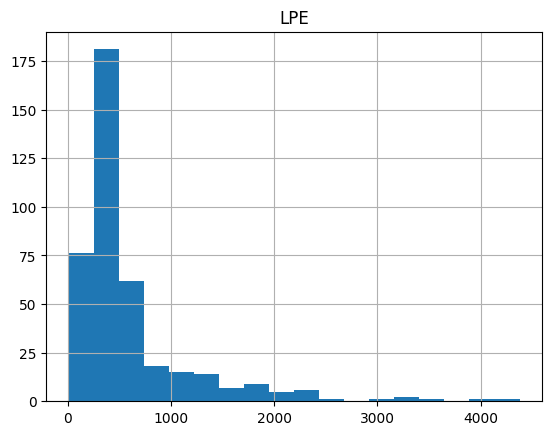

In [ ]:
y_tv.hist(bins=18) #esta variable tiene seso negativo por lo que si requiere que la transformemos.

array([[<Axes: title={'center': 'LPE'}>]], dtype=object)

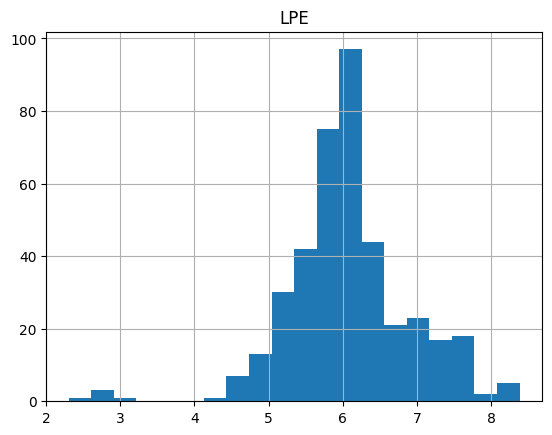

In [ ]:
#Se realiza transfornmación de Logaritmo natural
np.log( 1 + y_tv).hist(bins=20)

In [ ]:
#Analisis de las variables categoricas ,  cada nivel debera de tener al menos un 5%

X_tv["Category"].value_counts()

1    173
3    122
2    105
Name: Category, dtype: int64

In [ ]:
X_tv["Category"].value_counts() / X_tv.shape[0]


1    0.4325
3    0.3050
2    0.2625
Name: Category, dtype: float64

In [ ]:
X_tv["Paid"].value_counts()

0.0    291
1.0    108
Name: Paid, dtype: int64

In [ ]:
X_tv["Type"].value_counts()

Photo     343
Status     34
Link       17
Video       6
Name: Type, dtype: int64

In [ ]:
X_tv["Type"].value_counts() / X_tv.shape[0]

Photo     0.8575
Status    0.0850
Link      0.0425
Video     0.0150
Name: Type, dtype: float64

In [ ]:
#Definir las funciones para las transformaciones
def mi_power(X):
  M = np.max(X)
  tmp = np.power( M + 1 - X, .1)
  return tmp

def mi_log(y):
  tmp = np.log(1 + y)
  return tmp

def mi_invlog(y):
  tmp = np.exp(y) -1
  return tmp

def mi_type(X):
  X["Type"] = X["Type"].map({1:1, 2:2, 0:4, 3:4})
  return X

Al transformar la variable podemos obtener una variable con mejor compotamiento

**NOTA:** De acuerdo al significado de las variables en la Tabla 3, encontramos que estas son de tipo categórico oridnal y nominal. Por lo que les pondremos su tipo de variable correcto para realizar las transformaciones.

Las varaibles de la Tabla 2, al ser consideradas como posibles variables de salida, se quedan como tipo cuantitativas (int64)

In [ ]:
# Datos perdidos de variables numéricas:
numImp_pipe = Pipeline(steps = [("numImp", SimpleImputer(strategy="median"))])
numImp_pipe_nombres = ["Page total likes", "Post Month", "Post Weekday", "Post Hour"]

# Transformación del factor numérico de entrada "Page total likes":
numPow_pipe =  Pipeline(steps = [("numPow", FunctionTransformer(mi_power))])
numPow_pipe_nombre = ["Page total likes"]

# Datos perdidos de variables categóricas:
catImp_pipe = Pipeline(steps= [("catMap", FunctionTransformer(mi_type))])
catImp_pipe_nombres = ["Category", "Paid", "Type"]

# Transformación del factor categórico de entrada "Type":
catMap_pipe = Pipeline(steps = [("CatMap", FunctionTransformer(mi_type))])
catMap_pipe_nombres = ["Type"]

# Transformaciones One-Hot_Encoding:
catOhe_pipe = Pipeline(steps = [("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"))])
catOhe_pipe_nombres = ["Category", "Paid", "Type"]

# Transformaciones a factores numéricos de entrada:
cuant_pipeline = Pipeline(steps = [('impt_medianCuant', SimpleImputer(strategy='median')),
                                   ('escala_cuant', MinMaxScaler(feature_range=(0,1))),
                                   ('BoxCoxIndep', PowerTransformer())
                                   ])
cuant_pipeline_nombres = numeric_features
print(cuant_pipeline_nombres)

# Transformaciones a factores cualitativos de entrada:
categoricas_Imp_pipeline = Pipeline(steps = [('impModa_cate', SimpleImputer(strategy='most_frequent')),
                                             ('OneHotE', OneHotEncoder(drop='first'))])
catImp_pipeline_nombres = qualitative_features
print(catImp_pipeline_nombres)

# Transformaciones a factores binarios de entrada:
binarias_pipeline = Pipeline(steps = [('impModa_binary', SimpleImputer(strategy='most_frequent'))])
binarias_pipeline_nombres = binary_features
print(binarias_pipeline_nombres)

# Conjuntamos las transformaciones numéricas y cualitativas que se estarán aplicando a los datos de entrada:
columnasTransformer_X = ColumnTransformer(transformers =
                                          [('cuant_pipe', cuant_pipeline, cuant_pipeline_nombres),
                                           ('categ_pipe', categoricas_Imp_pipeline, catImp_pipeline_nombres),
                                           ('binar_pipe', binarias_pipeline, binarias_pipeline_nombres)],
                                        remainder='passthrough')

# Transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:

columnasTransformer_X = ColumnTransformer(transformers =
                                          [('cuant_pipe', cuant_pipeline, cuant_pipeline_nombres),
                                           ('categ_pipe', categoricas_Imp_pipeline, catImp_pipeline_nombres),
                                           ('binar_pipe', binarias_pipeline, binarias_pipeline_nombres)],
                                        remainder='passthrough')

# Transformaciones a variable de entrada:
variable_dep_pipeline = Pipeline(steps =
                                     [('impt_medianDep', SimpleImputer(strategy='median')),
                                      #('escala_Dep', MinMaxScaler(feature_range=(1,2))),
                                      #('BoxCoxDep', PowerTransformer())
                                      ])
variable_depNombre_pipeline = [y_tv.columns[0]]
print(variable_depNombre_pipeline)

# Conjuntamos las transformaciones numéricas y cualitativas que se estarán aplicando a los datos de entrada:
columnaTransformer_Y = ColumnTransformer(transformers =
                                          [('vardep', variable_dep_pipeline, variable_depNombre_pipeline)],
                                        remainder='passthrough')

['Page total likes', 'Post Hour', 'Post Month']
['Type', 'Category', 'Post Weekday']
['Paid']
['LPE']


**Comentario:**

Se utiliza para los datos cuantitativos una imputación por mediana dado que algunas variables tienen algo de sesgo y puede que empore. Luego, se toma un escalemiento entre 1 y 2, para mantener magnitudes comparables y sea posible aplicar una transformación Box-Cox.

#**Ejercicio 5**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. Consulta su documentación correspondiente: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [ ]:
#Partición del conjunto de entrenamiento y validación inicial: 100 para validación y 300 para entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, shuffle=True, random_state=1)


print(X_train.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(X_val.shape, ': dimensión de datos de entrada para prueba')

print(y_train.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(y_val.shape, ': dimensión de variable de salida para prueba')

(300, 7) : dimensión de datos de entrada para entrenamiento y validación
(100, 7) : dimensión de datos de entrada para prueba
(300, 1) : dimensión de variable de salida para entrenamiento y validación
(100, 1) : dimensión de variable de salida para prueba


In [ ]:
#pipeLine X
pipe_x = columnasTransformer_X.fit(X_train)
X_Train = pipe_x.fit_transform(X_train)
X_Val = pipe_x.fit_transform(X_val)

#pipeLine y
pipe_y = columnaTransformer_Y.fit(y_train)
Y_Train = pipe_y.fit_transform(y_train)
Y_Val = pipe_y.fit_transform(y_val)

# Crear un modelo DummyRegressor
modeloDR = DummyRegressor()

# Entrenar el modelo con los datos de entrenamiento
modeloDR.fit(X_train, y_train)

# Predecir los valores para los datos de entrenamiento y validación
y_pred_train = modeloDR.predict(X_train)
y_pred_val = modeloDR.predict(X_val)

# Calcular los errores RMSE, MAE y MAPE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_val, y_pred_val)

mape_train = 100 * mean_absolute_error(y_train, y_pred_train) / y_train.mean()
mape_val = 100 * mean_absolute_error(y_val, y_pred_val) / y_val.mean()

# Imprimir los resultados
print("Errores para el conjunto de entrenamiento:")
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("MAPE:", mape_train)

print("\nErrores para el conjunto de validación:")
print("RMSE:", rmse_val)
print("MAE:", mae_val)
print("MAPE:", mape_val)

Errores para el conjunto de entrenamiento:
RMSE: 579.6114922562833
MAE: 382.00168888888885
MAPE: LPE    63.549734
dtype: float64

Errores para el conjunto de validación:
RMSE: 653.0769132175611
MAE: 400.7133333333333
MAPE: LPE    65.012871
dtype: float64


#**Ejercicio 6**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor
modelo encontrado en esta primera aproximación. En particular ¿Hay alguno sobreentrenado o
subentrenado?

NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan.

In [ ]:
#Definicion de modelos a entrenar
def get_models():
  modelos = list()
  nombres = list()

  #LR - Regresión Logística:
  modelos.append(LinearRegression())
  nombres.append('LR')

  #RF - Bosque aleatorio:
  modelos.append(RandomForestRegressor())
  nombres.append('RF')

  #PM - Percepción Multicapa:
  modelos.append(MLPRegressor(max_iter = 10000))
  nombres.append('MLP')

  return modelos, nombres

In [ ]:
X_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 305 to 265
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          400 non-null    int64  
 1   Page total likes  400 non-null    int64  
 2   Type              400 non-null    object 
 3   Post Month        400 non-null    int64  
 4   Post Hour         400 non-null    int64  
 5   Post Weekday      400 non-null    int64  
 6   Paid              399 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 25.0+ KB


In [ ]:
modelos, nombres = get_models()
resultados = list()

for i in range(len(modelos)):

  ### modelo ###
  ### pipeline ###
  model = modelos[i]
  kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
  pipe = make_pipeline((columnasTransformer_X), (model))

  ## metricas ####
  mismetricas = {'RMSE':make_scorer(mi_RMSE),
                 'MAE':make_scorer(mi_MAE),
                 'MAPE':make_scorer(mi_MAPE)}

  resultadosOU = cross_validate(estimator = pipe,
                                X = X_tv,
                                y = np.ravel(y_tv),
                                scoring = mismetricas,
                                return_train_score = True,
                                cv = kfold,
                                n_jobs = -1)
  #print(resultadosOU)
  resultados.append(resultadosOU)

  #X_tv, X_test, ytv, y_test

  print(
      '%s:\nmean Train RMSE: %.3f (%.4f)\nmean Train MAE: %.3f (%.4f)\nmean Train MAPE: %.3f (%.4f)\n-------\nmean Test RMSE: %.3f (%.4f)\nmean Test MAE: %.3f (%.4f)\nmean Test MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_RMSE']),
                                                                          np.std(resultadosOU['train_RMSE']),
                                                                          np.mean(resultadosOU['train_MAE']),
                                                                          np.std(resultadosOU['train_MAE']),
                                                                          np.mean(resultadosOU['train_MAPE']),
                                                                          np.std(resultadosOU['train_MAPE']),
                                                                          np.mean(resultadosOU['test_RMSE']),
                                                                          np.std(resultadosOU['test_RMSE']),
                                                                          np.mean(resultadosOU['test_MAE']),
                                                                          np.std(resultadosOU['test_MAE']),
                                                                          np.mean(resultadosOU['test_MAPE']),
                                                                          np.std(resultadosOU['test_MAPE'])
                                                                          )
      )

LR:
mean Train RMSE: 480.634 (23.7997)
mean Train MAE: 292.919 (15.6696)
mean Train MAPE: 109.253 (10.0141)
-------
mean Test RMSE: 499.229 (100.9182)
mean Test MAE: 309.049 (43.0798)
mean Test MAPE: 116.449 (38.0347)

RF:
mean Train RMSE: 209.575 (15.5957)
mean Train MAE: 126.869 (9.8921)
mean Train MAPE: 42.156 (4.6212)
-------
mean Test RMSE: 557.734 (105.6770)
mean Test MAE: 346.206 (53.0727)
mean Test MAPE: 113.950 (35.8516)

MLP:
mean Train RMSE: 406.203 (25.2419)
mean Train MAE: 257.189 (17.2409)
mean Train MAPE: 87.565 (9.3367)
-------
mean Test RMSE: 513.131 (100.2721)
mean Test MAE: 320.975 (48.7972)
mean Test MAPE: 110.000 (37.9036)



Conclusiones:

Con el modelo de Regresion lineal se puede observar que el modelo se encuentra subentrenado, ya que cuenta con errores de la validacion son mayores
Modelo de Bosque aleatorio: se observa un modelo subentrenado, Se obserba que el Error es mayor al de validacion

Multicapa: Al igual que los otros el modelo se encuentra subentrenado.

Ninguno de los modelos aprende entre los datos de validación y entrenamiento.

#**Ejercicio 7**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

Train


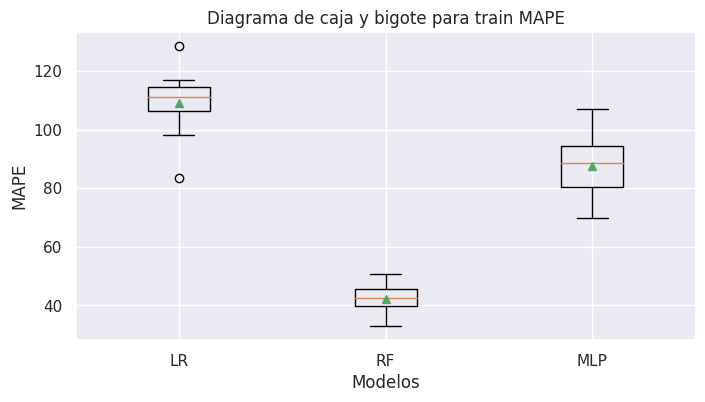

Test


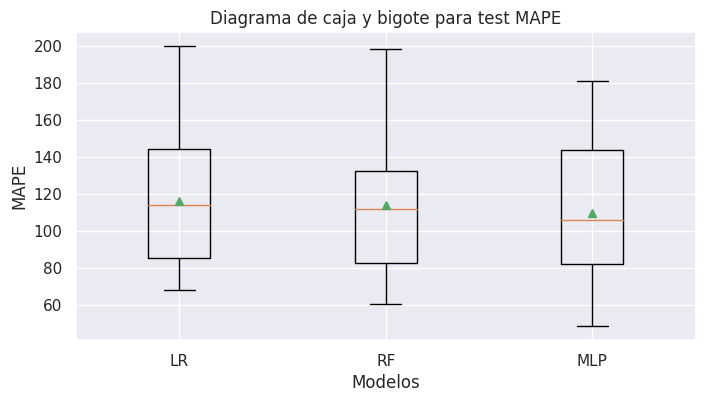

In [ ]:
# Etiquetas para los conjuntos de datos
datasets = ['train', 'test']

for dataset in datasets:
    print(dataset.capitalize())
    bpGmean = [resultados[i][f'{dataset}_MAPE'] for i in range(len(resultados))]

    sns.set(rc={'figure.figsize':(8,4)})
    plt.boxplot(bpGmean, labels=nombres, showmeans=True)
    plt.xlabel('Modelos')
    plt.ylabel('MAPE')
    plt.title(f'Diagrama de caja y bigote para {dataset} MAPE')
    plt.show()

En el segmento de entrenamiento:
Los boxplot de los 3 modelos, cubren una cantidad reducida del set de datos y además no es homogenea ya que el Bosque aleatorio representa el set entre 30-40 mientras que los otros modelos están entre 80-100, en los casos de Bosque y perceptron, sí se presentan outliers.

En el caso del Bosque aleatorio se observa un comportamiento anormal, porque el primer cuartil, el promedio y la mediana se encuentran prácticamente encimados en una zona muy concentrada de la curva, por lo que dicho conjunto de datos está muy concentrado y no aporta datos significativos para este modelo.

Datos de validacion:
El boxplot de Bosque aleatorio: se muestra una distribucion normal pero con mas varianza de los conjuntos de los datos aunque no presenta outliers

Los boxplot de Regresión lineal y multicapa, muestran distribuciones con un claro sesgo a la izquierda y sus cajas son más amplias y con mayor varianza.


#**Ejercicio 8**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.

In [ ]:
# Obtener modelos y parámetros
modelo = MLPRegressor(random_state=7, max_iter=30000)
dicc_grid = {'hidden_layer_sizes': [(100,75,25,10), (10,5,2), (10,10,10), (10,7,5,2)],
             'alpha': [0.0001, 0.01],
             'learning_rate_init': [0.001, 0.01, 1]
            }

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring=make_scorer(mi_MAPE),
                    n_jobs=-1)

# Transformamos los datos de entrada:
Xx = columnasTransformer_X.fit_transform(X_tv)

# Realizar la búsqueda de hiperparámetros
grid.fit(Xx, np.ravel(y_tv))

# Obtener los mejores hiperparámetros y puntuación
mejores_hiperparametros = grid.best_params_
mejor_puntuacion = grid.best_score_

print("Mejores hiperparámetros encontrados:")
print('Mejor valor de MAPE obtenido con la mejor combinación:', mejor_puntuacion)
print('Mejor combinación de valores encontrados de los hiperparámetros:', mejores_hiperparametros)
print('Métrica utilizada:', grid.scoring)

Mejores hiperparámetros encontrados:
Mejor valor de MAPE obtenido con la mejor combinación: 151.08547603178567
Mejor combinación de valores encontrados de los hiperparámetros: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 75, 25, 10), 'learning_rate_init': 0.001}
Métrica utilizada: make_scorer(mi_MAPE)


#**Ejercicio 9**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

In [ ]:
# Crear el modelo MLPRegressor con los mejores hiperparámetros
modelo_MLP =  MLPRegressor(hidden_layer_sizes = (100, 75, 25, 10), alpha = 0.0001,
                      learning_rate_init = 0.001,
                      max_iter = 30000, random_state=7)

# Transformación de información
prepro = columnasTransformer_X.fit(X_tv)
X_tv_transformed = prepro.transform(X_tv)
X_test_transformed = prepro.transform(X_test)

# Convertir y_tv a un arreglo unidimensional
y_tv = np.ravel(y_tv)

# Entrenamiento del modelo
MLPMejorado = modelo_MLP.fit(X_tv_transformed, y_tv)
y_hat = MLPMejorado.predict(X_test_transformed)
mape_score = mi_MAPE(np.ravel(y_test), y_hat)
print("MAPE obtenido:", mape_score)

MAPE obtenido: 101.51726062724212


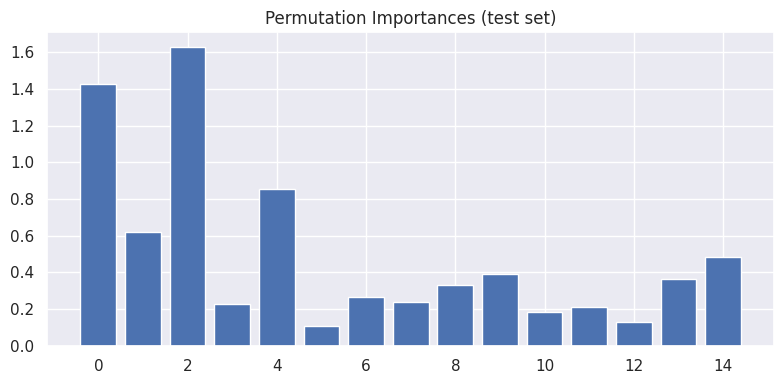

In [ ]:
# Obtener la importancia de las características
importancias = np.abs(modelo_MLP.coefs_[0])

# Obtener el nombre de las características
nombres_caracteristicas = X_train.columns

# Obtener la importancia de características mediante permutation importance
importance = permutation_importance(MLPMejorado, prepro.transform(X_tv), y_tv, n_repeats=10, n_jobs=-1)
importance_sorted_idx = importance.importances_mean.argsort()

# Crear el diagrama de barras de las importancias
fig, ax = plt.subplots()
ax.bar(importance_sorted_idx, importance.importances[importance_sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

Conclusiones:

en el modelo de multicapa se puede considerar que las variables de 1, 3 y 5 son los de mayor importancia. Estas equivalen a las columnas de Total likes, "Post month" y "Post hour"

#**Ejercicio 10**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.

In [ ]:
#Random Forest
modelo = RandomForestRegressor(random_state=7)

dicc_grid = {
    'n_estimators': [5, 20, 50, 100],
    'ccp_alpha': [0.001, 0.01, 1.0],
    'max_depth': [2, 6, 10],
    'min_samples_split': [5, 10, 15],
    'bootstrap': [True, False],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 3, 4]
}

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(
    estimator=modelo,
    param_grid=dicc_grid,
    cv=cv,
    scoring=make_scorer(mi_MAPE),
    n_jobs=-1
)

# Transformamos los datos de entrada:
Xx = columnasTransformer_X.fit_transform(X_tv)

grid.fit(Xx, np.ravel(y_tv))

print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de MAPE obtenido con la mejor combinación: 133.97901275585124
Mejor combinación de valores encontrados de los hiperparámetros: {'bootstrap': True, 'ccp_alpha': 0.001, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100}
Métrica utilizada: make_scorer(mi_MAPE)


In [ ]:
RFRmodel = RandomForestRegressor(n_estimators = grid.best_estimator_.n_estimators,
                       max_features = grid.best_estimator_.max_features,
                       max_depth = grid.best_estimator_.max_depth,
                       min_samples_split = grid.best_estimator_.min_samples_split,
                       min_samples_leaf = grid.best_estimator_.min_samples_leaf,
                       bootstrap = grid.best_estimator_.bootstrap,
                       random_state=1
                       )

In [ ]:
#Transformacion de informacion
prepro = columnasTransformer_X.fit(X_tv)
X_testTransf = prepro.fit_transform(X_test)

#Entrenamiento de logit
RFRMejorado = RFRmodel.fit(prepro.fit_transform(X_tv), np.ravel(y_tv))
y_hat = RFRMejorado.predict(X_testTransf)
mi_MAPE(np.ravel(y_test), y_hat)

117.37643317481421

In [ ]:
pd.DataFrame(X_testTransf)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.798181,0.710144,0.876712,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.435319,1.787320,-1.251698,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.798181,-1.695982,0.876712,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.564283,-1.090459,0.536577,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.880219,0.331552,0.876712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.127908,0.331552,1.228282,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,-0.001255,-1.090459,-0.108568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,1.199426,-1.090459,1.591101,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.977269,-1.090459,1.228282,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


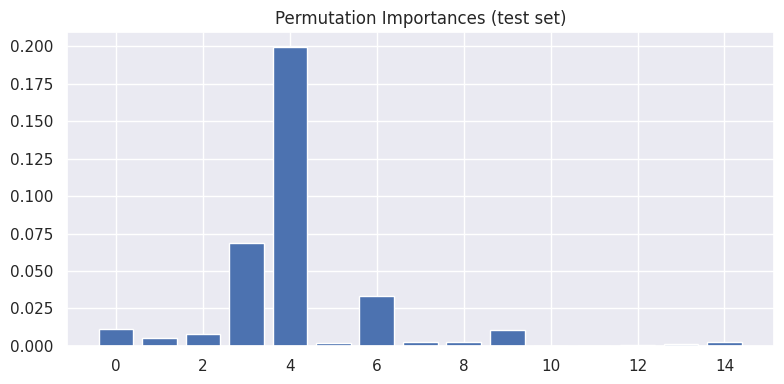

In [ ]:
importance = permutation_importance(RFRMejorado,
                                    pd.DataFrame(prepro.fit_transform(X_tv)),
                                    y_tv,
                                    n_repeats=10,
                                    n_jobs=-1)
importance_sorted_idx = importance.importances_mean.argsort()

fig, ax = plt.subplots()
ax.bar(importance_sorted_idx, importance.importances[importance_sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

#**Ejercicio 11**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.

In [ ]:
#LinearRegression

modelo_LR = LinearRegression()

dicc_grid = {'fit_intercept': [True, False],
             'copy_X': [True, False]
             }

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo_LR,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring=make_scorer(mi_MAPE),
                    n_jobs = -1)

# Transformamos los datos de entrada:
Xx = columnasTransformer_X.fit_transform(X_tv)

grid.fit(Xx, np.ravel(y_tv))

print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de MAPE obtenido con la mejor combinación: 117.3245691550928
Mejor combinación de valores encontrados de los hiperparámetros: {'copy_X': True, 'fit_intercept': True}
Métrica utilizada: make_scorer(mi_MAPE)


In [ ]:
LRmodelo = LinearRegression(copy_X = grid.best_params_['copy_X'],
                            fit_intercept = grid.best_params_['fit_intercept'])

#Transformacion de informacion
prepro = columnasTransformer_X.fit(X_tv)
X_testTransf = prepro.fit_transform(X_test)

#Entrenamiento de logit
LRmejorado = modelo_LR.fit(prepro.fit_transform(X_tv), y_tv)
y_hat = LRmejorado.predict(X_testTransf)
mi_MAPE(np.ravel(y_test), y_hat)

94.19210591621686

In [ ]:
importance = permutation_importance(LRmejorado,
                                    pd.DataFrame(prepro.fit_transform(X_tv)),
                                    y_tv,
                                    n_repeats=10,
                                    n_jobs=-1)
importance_sorted_idx = importance.importances_mean.argsort()

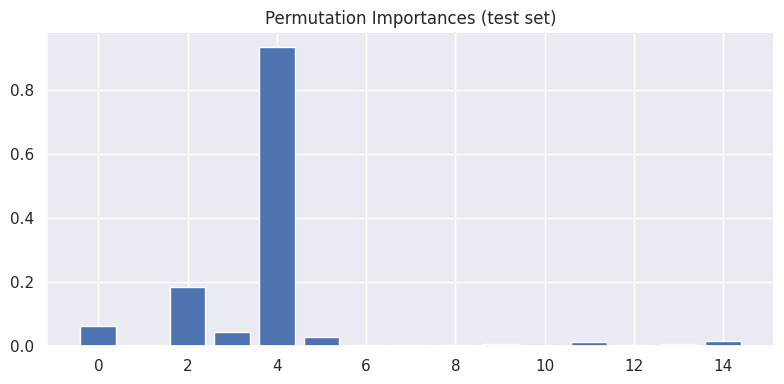

In [ ]:
fig, ax = plt.subplots()
ax.bar(importance_sorted_idx, importance.importances[importance_sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

#**Ejercicio 12**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad.

Aplicación de data mining: El estudio utilizó técnicas de data mining para predecir las métricas de rendimiento de las publicaciones en las páginas de Facebook de marcas. Esto demuestra la aplicabilidad de la minería de datos en el análisis y pronóstico de datos en redes sociales.

Modelado de métricas de rendimiento: Se crearon modelos para predecir métricas de rendimiento de publicaciones en una página de Facebook de una empresa cosmética. Los modelos lograron un error absoluto porcentual medio de alrededor del 27%, lo que indica una capacidad razonable para predecir las métricas de rendimiento.

Importancia de las características de entrada: Se realizó un análisis de sensibilidad en uno de los modelos ("Lifetime Post Consumers") para comprender cómo cada una de las siete características de entrada influyó en él. Se encontró que el tipo de contenido fue la característica más relevante, con una relevancia del 36%. Las publicaciones de estado capturaron aproximadamente el doble de atención que los otros tipos de publicaciones (enlace, foto, video).

Flujo de proceso de decisión: A partir del modelo "Lifetime Post Consumers" y la información del análisis de sensibilidad, se creó un flujo de proceso de decisión. Este flujo puede ayudar a los gerentes a tomar decisiones sobre si publicar o no una publicación en función de las características relevantes identificadas por el modelo.

En resumen, el estudio demuestra que el uso de técnicas de machine learning, como la minería de datos y la modelización predictiva, puede ser efectivo para predecir las métricas de rendimiento de las publicaciones en las páginas de Facebook de las marcas. Además, identifica la importancia del tipo de contenido como un factor clave en el rendimiento de las publicaciones y proporciona un flujo de proceso de decisión para respaldar las decisiones de los gerentes en cuanto a las publicaciones.

#**Bibliografía**



*   Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69, 3341-3351. https://www.sciencedirect.com/science/article/abs/pii/S0148296316000813?via%3Dihub

###**Fin de la Actividad de la semana 7.**